In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, roc_auc_score, average_precision_score, confusion_matrix, matthews_corrcoef, balanced_accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
)

In [19]:
df = pd.read_csv("KM-32-2.csv")

#1

In [20]:
print("Кількість об’єктів кожного класу:")
counts = df["GT"].value_counts()
print(counts)

Кількість об’єктів кожного класу:
GT
0    2500
1    2500
Name: count, dtype: int64


#2

In [21]:

record = []
min_treshold = 0
max_treshold = 1
thresholds = np.linspace(min_treshold, max_treshold, 21)  # обрала крок 0.05
y_true = df["GT"]
y_score_results = [df["Model_1"],df["Model_2"]]
for thr in thresholds:
        for model_result in y_score_results:
            model_name = model_result.name
            y_pred = (model_result >= thr)

            cm = confusion_matrix(y_true, y_pred)
            tn, fp, fn, tp = cm.ravel()

            # Метрики
            acc  = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec  = recall_score(y_true, y_pred, zero_division=0)
            f1   = f1_score(y_true, y_pred, zero_division=0)
            f05  = fbeta_score(y_true, y_pred, beta=0.5, zero_division=0)
            f2   = fbeta_score(y_true, y_pred, beta=2.0, zero_division=0)
            mcc  = matthews_corrcoef(y_true, y_pred)           
            bal_acc  = balanced_accuracy_score(y_true, y_pred)     
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
            fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan
            youden_j = tpr - fpr

            auc_roc = roc_auc_score(y_true, model_result)          
            auc_pr  = average_precision_score(y_true, model_result) 

            record.append({
                "model": model_name, 
                "threshold": thr,
                "TP": tp, "FP": fp, "TN": tn, "FN": fn,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F0.5": f05,
                "F1": f1,
                "F2": f2,
                "MCC": mcc,
                "Balanced_Accuracy": bal_acc,
                "Youden_J": youden_j,
                "AUC_ROC": auc_roc,  
                "AUC_PR": auc_pr      
            })
record_df = pd.DataFrame(record).sort_values(["model", "threshold"], ignore_index=True)
print(record)
print(record_df)

[{'model': 'Model_1', 'threshold': 0.0, 'TP': 2500, 'FP': 2500, 'TN': 0, 'FN': 0, 'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F0.5': 0.5555555555555556, 'F1': 0.6666666666666666, 'F2': 0.8333333333333334, 'MCC': 0.0, 'Balanced_Accuracy': 0.5, 'Youden_J': 0.0, 'AUC_ROC': 0.8713723999999999, 'AUC_PR': 0.8802355401853349}, {'model': 'Model_2', 'threshold': 0.0, 'TP': 2500, 'FP': 2500, 'TN': 0, 'FN': 0, 'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F0.5': 0.5555555555555556, 'F1': 0.6666666666666666, 'F2': 0.8333333333333334, 'MCC': 0.0, 'Balanced_Accuracy': 0.5, 'Youden_J': 0.0, 'AUC_ROC': 0.9258819200000001, 'AUC_PR': 0.9321857811121873}, {'model': 'Model_1', 'threshold': 0.05, 'TP': 2500, 'FP': 2500, 'TN': 0, 'FN': 0, 'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F0.5': 0.5555555555555556, 'F1': 0.6666666666666666, 'F2': 0.8333333333333334, 'MCC': 0.0, 'Balanced_Accuracy': 0.5, 'Youden_J': 0.0, 'AUC_ROC': 0.8713723999999999, 'AUC_PR': 0.8802355401853349}, {'model': 'Mod

#3

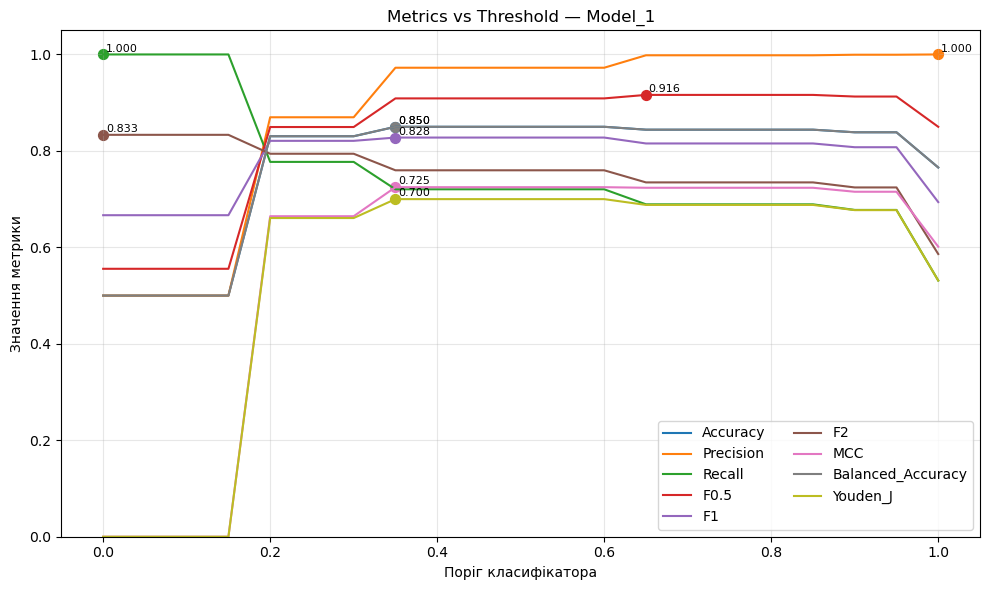

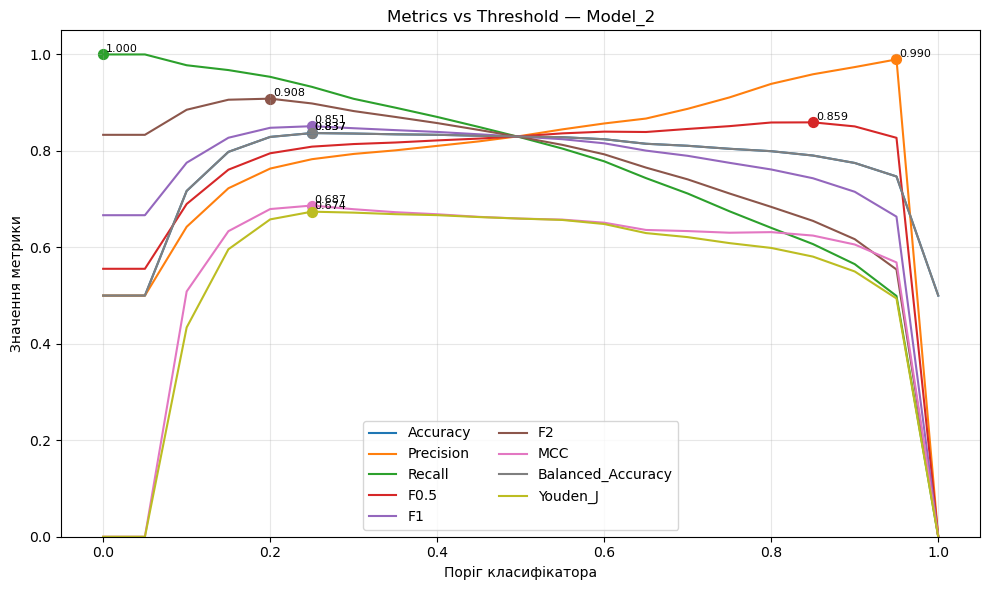

In [22]:

def plot_metrics_for_model(metrics_df, model_name):
    dfm = metrics_df[metrics_df["model"] == model_name].copy()

    metric_cols = ["Accuracy","Precision","Recall","F0.5","F1","F2",
                   "MCC","Balanced_Accuracy","Youden_J"]

    plt.figure(figsize=(10, 6))
    for col in metric_cols:
        if dfm[col].notna().any():
            # крива
            plt.plot(dfm["threshold"], dfm[col], label=col)
            # максимум
            idx_max = dfm[col].idxmax(skipna=True)
            thr_max = dfm.loc[idx_max, "threshold"]
            val_max = dfm.loc[idx_max, col]
            plt.scatter([thr_max], [val_max], s=50)
            plt.annotate(f"{val_max:.3f}",
                         (thr_max, val_max),
                         xytext=(2, 2), textcoords="offset points", fontsize=8)

    plt.title(f"Metrics vs Threshold — {model_name}")
    plt.xlabel("Поріг класифікатора")
    plt.ylabel("Значення метрики")
    plt.ylim(0.00, 1.05)   
    plt.grid(True, alpha=0.3)
    plt.legend(ncol=2)
    plt.tight_layout()
    plt.show()


plot_metrics_for_model(record_df, "Model_1")
plot_metrics_for_model(record_df, "Model_2")


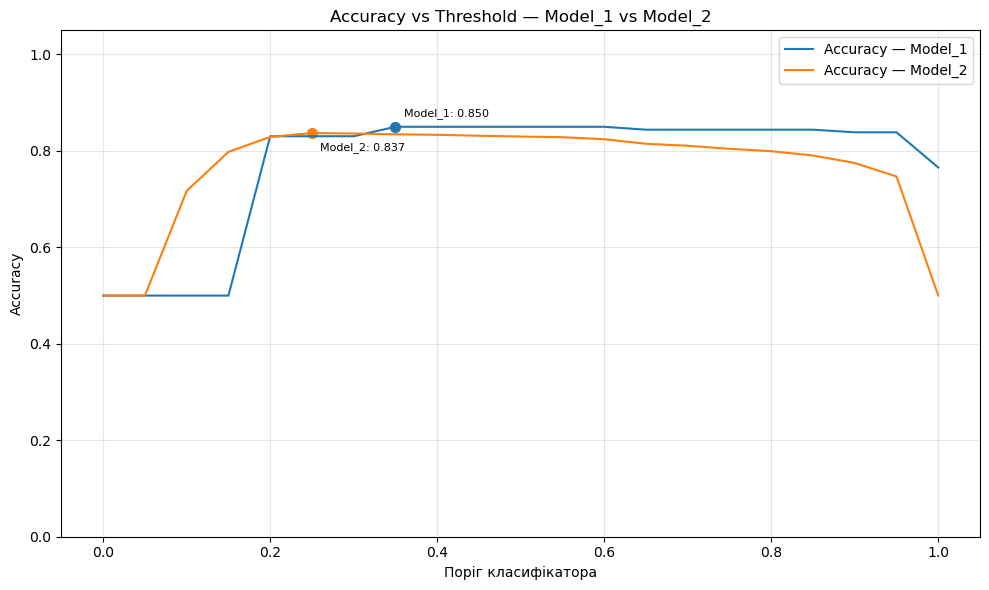

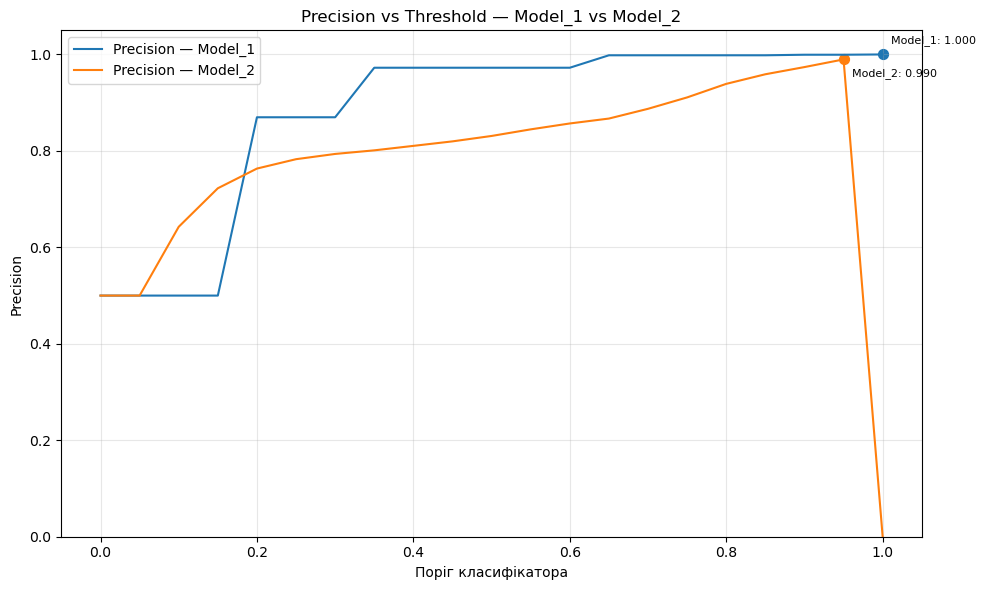

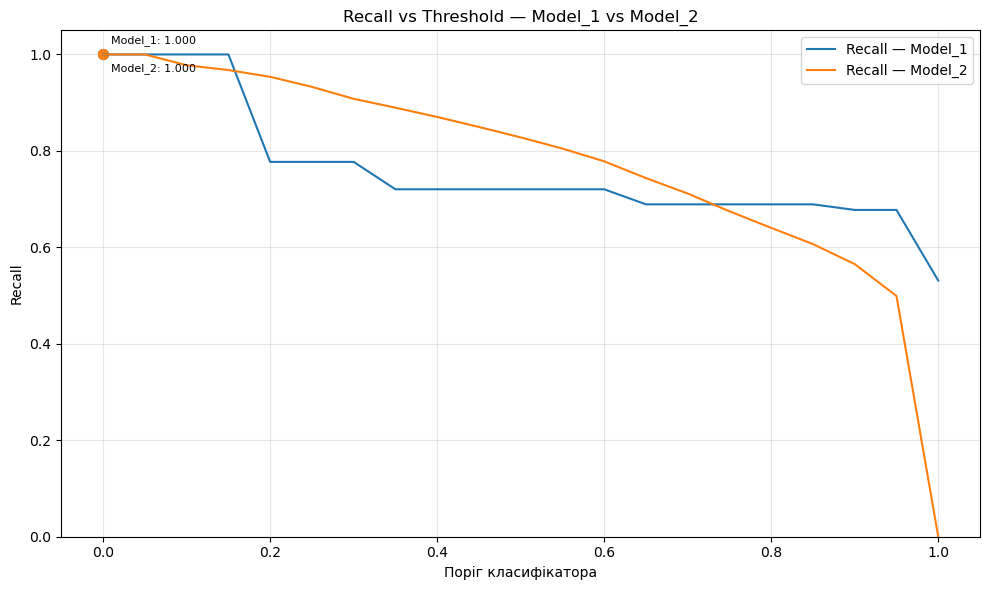

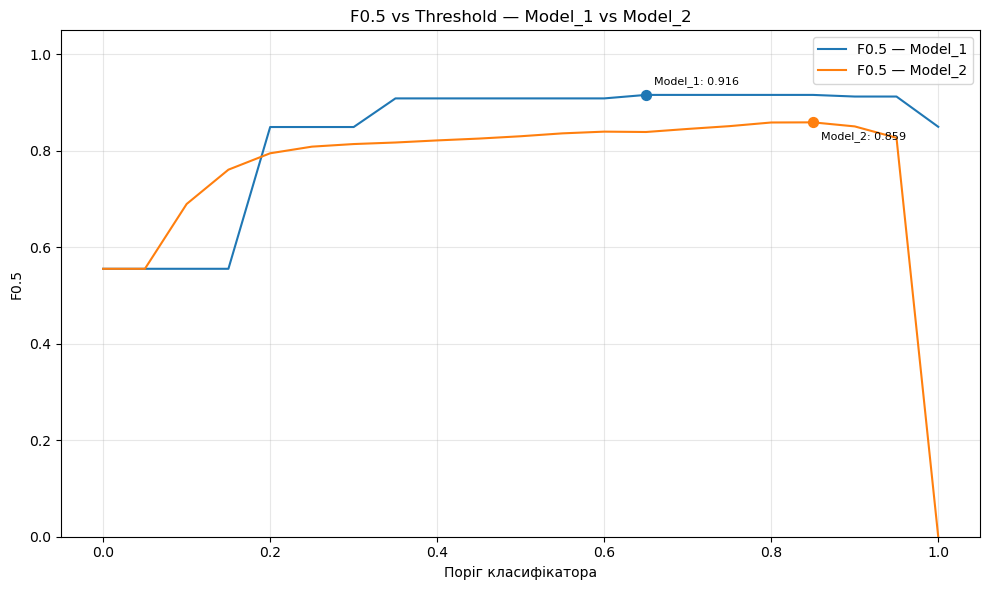

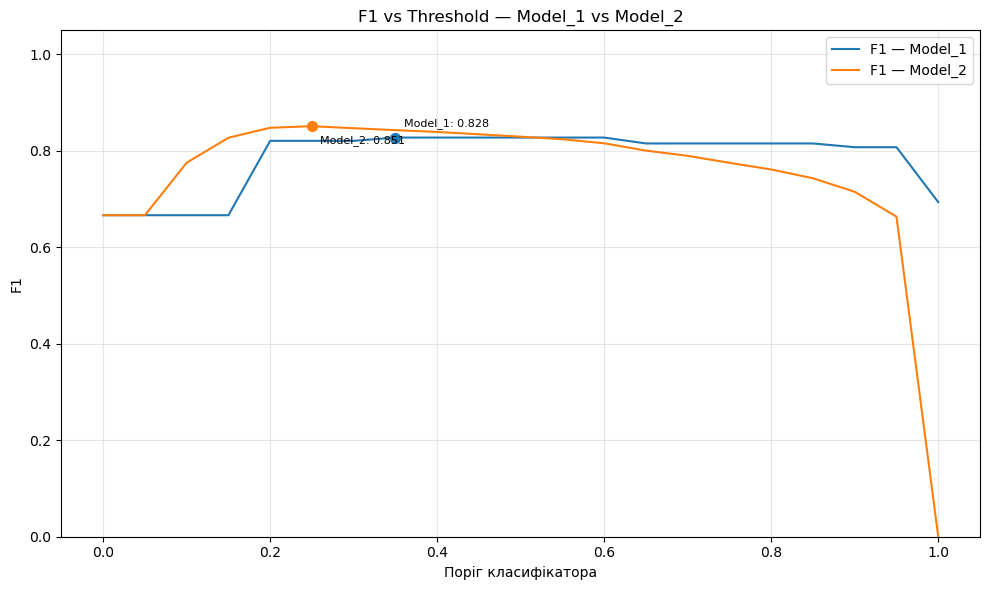

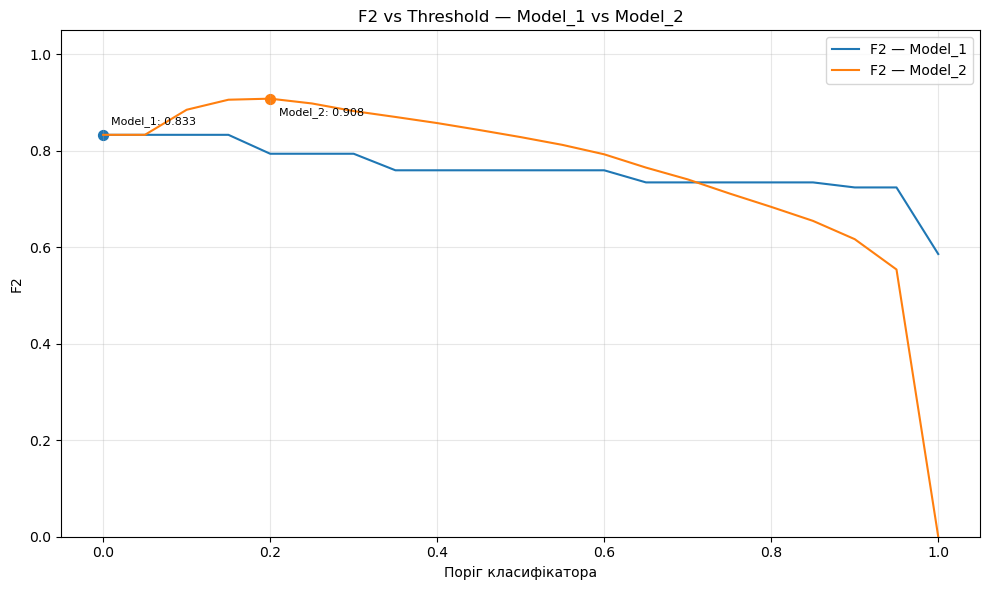

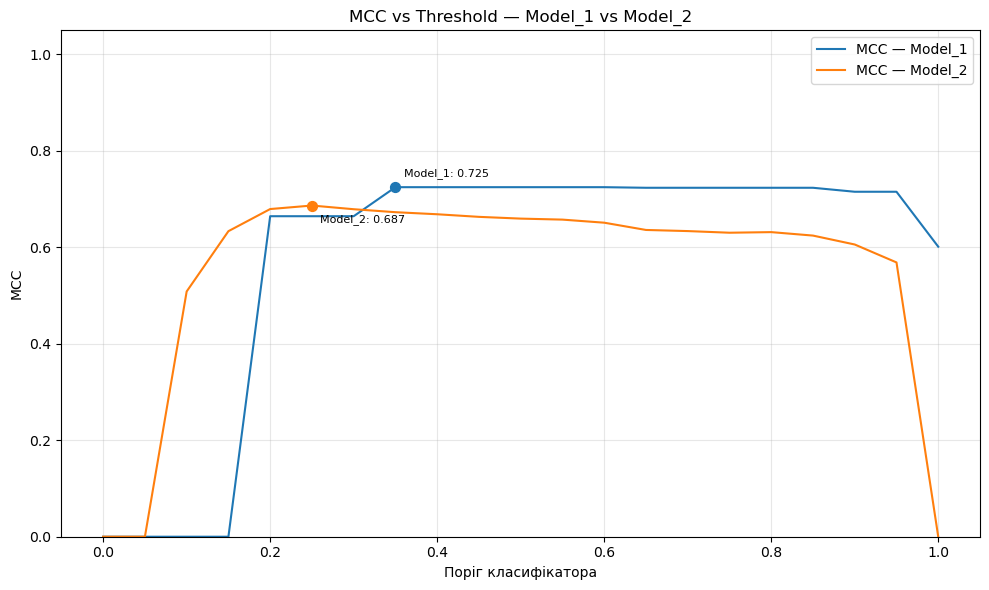

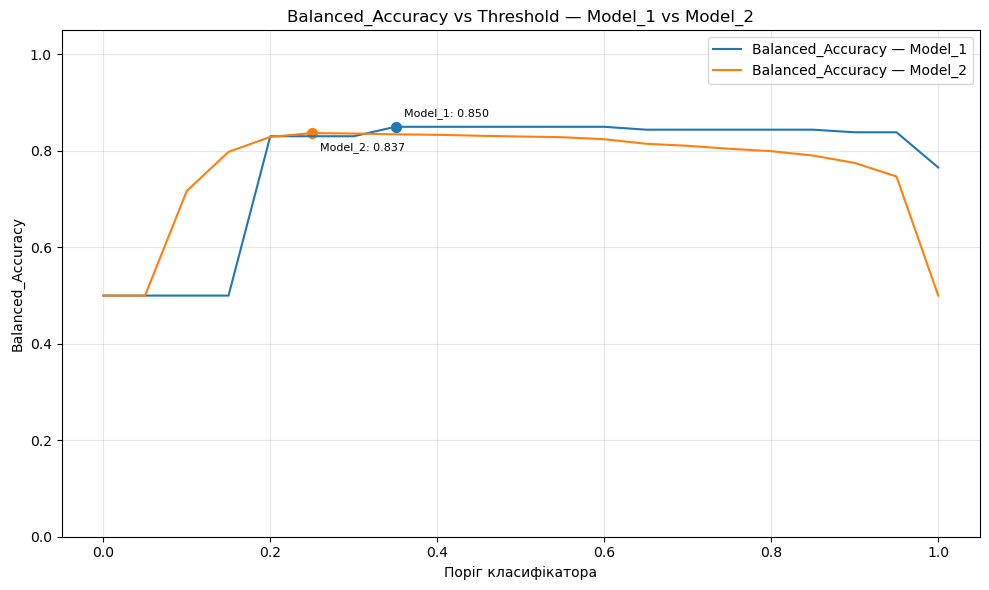

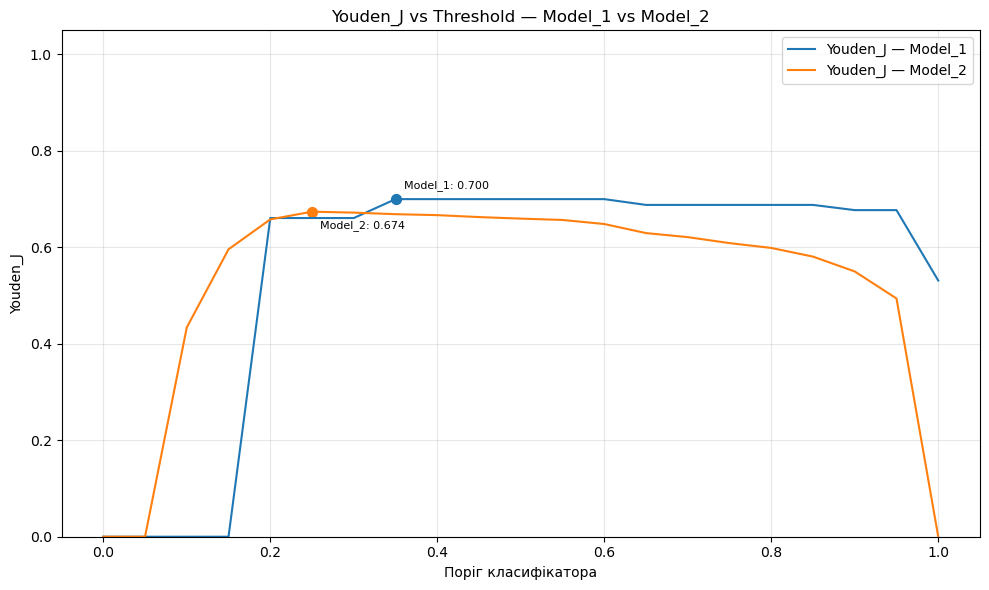

In [23]:
def plot_metric_separately(metrics_df, model1="Model_1", model2="Model_2",
                           metric_cols=None, save=False, prefix="metric_"):

    if metric_cols is None:
        metric_cols = ["Accuracy","Precision","Recall","F0.5","F1","F2",
                       "MCC","Balanced_Accuracy","Youden_J"]

    for col in metric_cols:
        df1 = metrics_df.loc[metrics_df["model"] == model1, ["threshold", col]].dropna(subset=[col]).reset_index(drop=True)
        df2 = metrics_df.loc[metrics_df["model"] == model2, ["threshold", col]].dropna(subset=[col]).reset_index(drop=True)


        if df1.empty and df2.empty:
            continue

        plt.figure(figsize=(10, 6))

        if not df1.empty:
            plt.plot(df1["threshold"], df1[col], label=f"{col} — {model1}")
            i1 = df1[col].idxmax()
            thr1, val1 = df1.at[i1, "threshold"], df1.at[i1, col]
            plt.scatter([thr1], [val1], s=50)
            plt.annotate(f"{model1}: {val1:.3f}",
                         (thr1, val1), xytext=(6, 8), textcoords="offset points", fontsize=8)


        if not df2.empty:
            plt.plot(df2["threshold"], df2[col], label=f"{col} — {model2}")
            i2 = df2[col].idxmax()
            thr2, val2 = df2.at[i2, "threshold"], df2.at[i2, col]
            plt.scatter([thr2], [val2], s=50)
            plt.annotate(f"{model2}: {val2:.3f}",
                         (thr2, val2), xytext=(6, -12), textcoords="offset points", fontsize=8)

        plt.title(f"{col} vs Threshold — {model1} vs {model2}")
        plt.xlabel("Поріг класифікатора")
        plt.ylabel(col)

        if col in ("MCC", "Youden_J"):
            plt.ylim(0.0, 1.05)
        else:
            plt.ylim(0.0, 1.05)
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.tight_layout()

        if save:
            plt.savefig(f"{prefix}{col}.png", dpi=150)

        plt.show()
plot_metric_separately(record_df, model1="Model_1", model2="Model_2")


#4

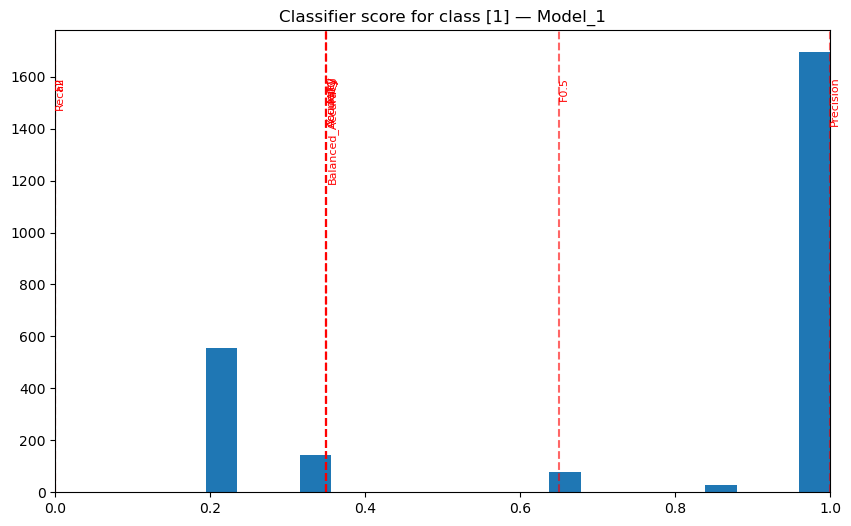

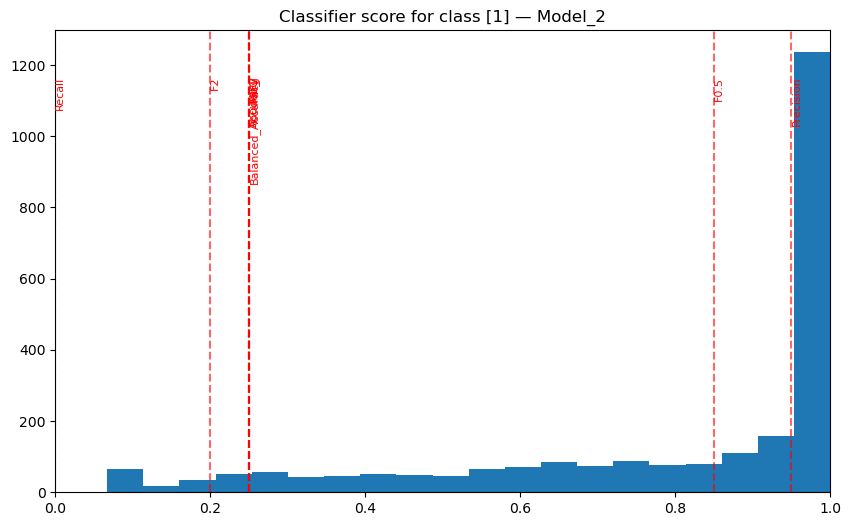

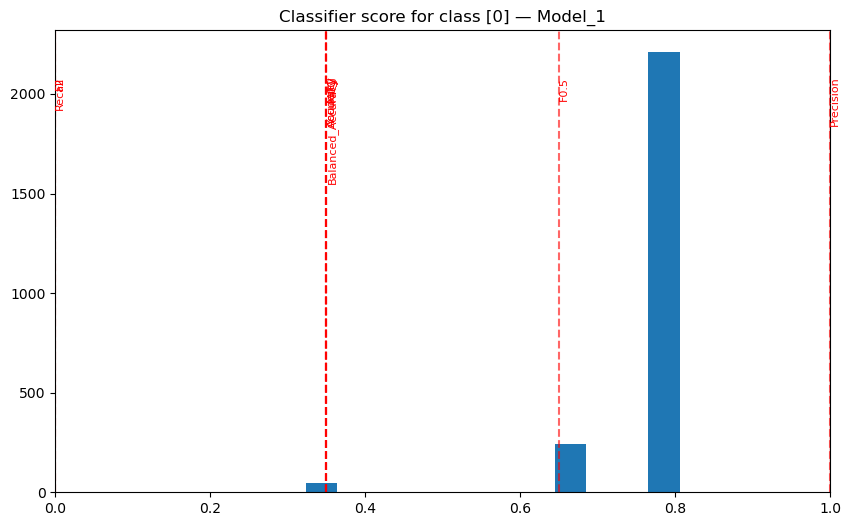

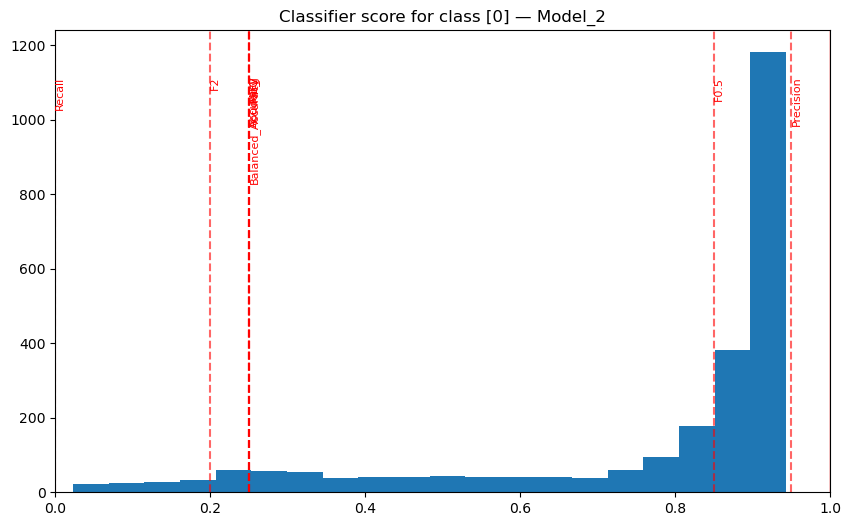

In [24]:
def classifier_score(df, record_df ):
    cls = [0,1]
    subset_1 = df[df["GT"]==cls[1]]
    model_names = ["Model_1","Model_2"]
    metric_cols = ["Accuracy","Precision","Recall","F0.5","F1","F2",
                       "MCC","Balanced_Accuracy","Youden_J"]


    for model in model_names:
        plt.figure(figsize=(10, 6))
        plt.hist(subset_1[model], bins = 20)
        plt.title(f"Classifier score for class [1] — {model}")
        df_model = record_df[record_df["model"] == model]
        for metric in metric_cols:
                max_val = df_model[metric].max()
                max_thr = df_model.loc[df_model[metric] == max_val, "threshold"].values[0]
                plt.axvline(max_thr, color='red', linestyle='--', alpha=0.6)
                plt.text(max_thr, plt.ylim()[1]*0.9, metric, rotation=90,
                         fontsize=8, color='red', va='top')   

        plt.xlim(0, 1)



    subset_0 = df[df["GT"]==cls[0]].copy()
    subset_0["Model_1"] = 1 - subset_0["Model_1"]
    subset_0["Model_2"] = 1 - subset_0["Model_2"] 
    model_names = ["Model_1","Model_2"]

    for model in model_names:
        plt.figure(figsize=(10, 6))
        plt.hist(subset_0[model], bins = 20)
        plt.title(f"Classifier score for class [0] — {model}")
        df_model = record_df[record_df["model"] == model]
        for metric in metric_cols:
                max_val = df_model[metric].max()
                max_thr = df_model.loc[df_model[metric] == max_val, "threshold"].values[0]
                plt.axvline(max_thr, color='red', linestyle='--', alpha=0.6)
                plt.text(max_thr, plt.ylim()[1]*0.9, metric, rotation=90,
                         fontsize=8, color='red', va='top')   
        plt.axvline(thr, linewidth=1, color = 'red')
        plt.xlim(0, 1)

classifier_score(df, record_df)


#5

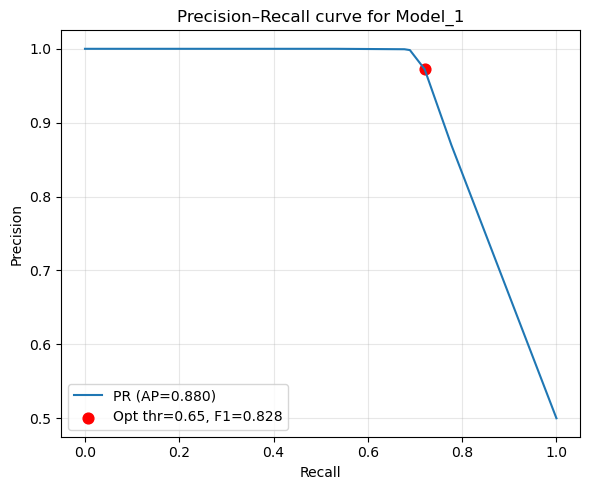

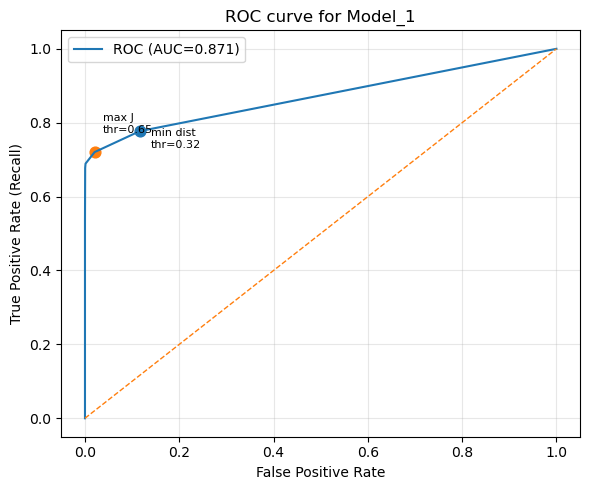

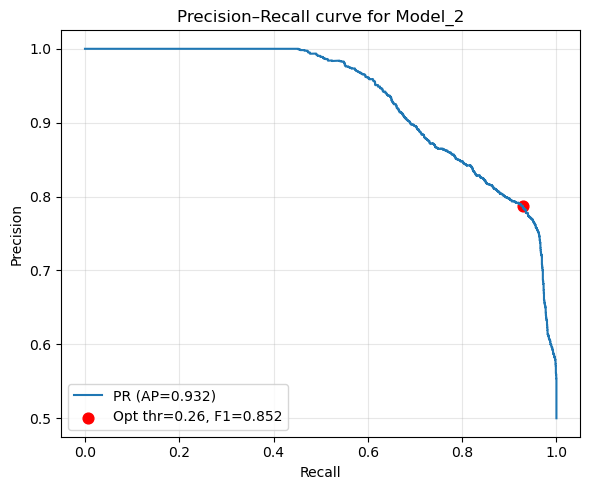

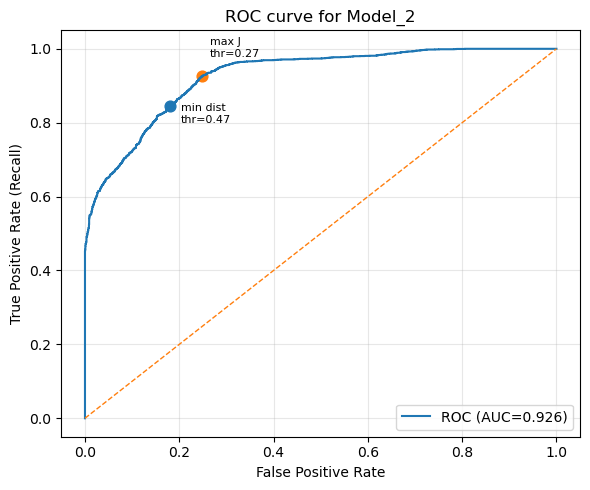

In [25]:
def roc_pr_for_models(df):
        y_score_results = [df["Model_1"],df["Model_2"]]
        for model_result in y_score_results:
                model_name = model_result.name

                prec, rec, thr_pr = precision_recall_curve(y_true, model_result)
                fpr, tpr, thr_roc = roc_curve(y_true, model_result)

                auc_roc = roc_auc_score(y_true, model_result)          
                auc_pr  = average_precision_score(y_true, model_result)         

                f1s = 2 * (prec * rec) / (prec + rec + 1e-9)   
                ix_pr = np.argmax(f1s)                         
                thr_opt_pr = thr_pr[ix_pr] if ix_pr < len(thr_pr) else 1.0
                
                plt.figure(figsize=(6,5))
                plt.plot(rec, prec, label=f"PR (AP={auc_pr:.3f})") 
                plt.scatter(rec[ix_pr], prec[ix_pr], c="red", s=60,
                label=f"Opt thr={thr_opt_pr:.2f}, F1={f1s[ix_pr]:.3f}") 
                plt.xlabel("Recall"); plt.ylabel("Precision")
                plt.title(f"Precision–Recall curve for {model_name}")
                plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout()
                plt.show()

        
                # 1) Мінімальна евклідова відстань до (0,1)
                dist = np.sqrt((fpr - 0.0)**2 + (tpr - 1.0)**2)
                i_min = np.argmin(dist)
                thr_min = thr_roc[i_min]

                # 2) Youden's J
                youdenJ = tpr - fpr
                i_j = np.argmax(youdenJ)
                thr_j = thr_roc[i_j]

                plt.figure(figsize=(6,5))
                plt.plot(fpr, tpr, label=f"ROC (AUC={auc_roc:.3f})")
                plt.plot([0,1], [0,1], linestyle="--", linewidth=1) 

                plt.scatter(fpr[i_min], tpr[i_min], s=60)
                plt.annotate(f"min dist\nthr={thr_min:.2f}",
                                (fpr[i_min], tpr[i_min]), xytext=(8,-12),
                                textcoords="offset points", fontsize=8)

        
                plt.scatter(fpr[i_j], tpr[i_j], s=60)
                plt.annotate(f"max J\nthr={thr_j:.2f}",
                                (fpr[i_j], tpr[i_j]), xytext=(6,14),
                                textcoords="offset points", fontsize=8)
                plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate (Recall)")
                plt.title(f"ROC curve for {model_name}")
                plt.grid(True, alpha=.3); plt.legend(); plt.tight_layout()
                plt.show()
        
roc_pr_for_models(df)

#6

In [26]:
birth_date = "20-02"  
month = int(birth_date.split("-")[1])   
K = month % 4
delete_pct = 50 + 10 * K
print(f"K = {K}, відсоток видалення класу 1: {delete_pct}%")
idx_class1 = df[df["GT"] == 1].index
n_class1 = len(idx_class1)
n_delete = int(n_class1 * delete_pct / 100)
to_drop = np.random.choice(idx_class1, size=n_delete, replace=False)
df_reduced = df.drop(to_drop)

print(f"Видалено {n_delete} об’єктів класу 1 з {n_class1} "
      f"({delete_pct:.1f}%)")
print("Кількість об’єктів у новому наборі:")
print(df_reduced["GT"].value_counts())


K = 2, відсоток видалення класу 1: 70%
Видалено 1750 об’єктів класу 1 з 2500 (70.0%)
Кількість об’єктів у новому наборі:
GT
0    2500
1     750
Name: count, dtype: int64


#7

[{'model': 'Model_1', 'threshold': 0.0, 'TP': 750, 'FP': 2500, 'TN': 0, 'FN': 0, 'Accuracy': 0.23076923076923078, 'Precision': 0.23076923076923078, 'Recall': 1.0, 'F0.5': 0.2727272727272727, 'F1': 0.375, 'F2': 0.6, 'MCC': 0.0, 'Balanced_Accuracy': 0.5, 'Youden_J': 0.0, 'AUC_ROC': 0.8814666666666666, 'AUC_PR': 0.8195537979096683}, {'model': 'Model_2', 'threshold': 0.0, 'TP': 750, 'FP': 2500, 'TN': 0, 'FN': 0, 'Accuracy': 0.23076923076923078, 'Precision': 0.23076923076923078, 'Recall': 1.0, 'F0.5': 0.2727272727272727, 'F1': 0.375, 'F2': 0.6, 'MCC': 0.0, 'Balanced_Accuracy': 0.5, 'Youden_J': 0.0, 'AUC_ROC': 0.9273104, 'AUC_PR': 0.8421681938407846}, {'model': 'Model_1', 'threshold': 0.05, 'TP': 750, 'FP': 2500, 'TN': 0, 'FN': 0, 'Accuracy': 0.23076923076923078, 'Precision': 0.23076923076923078, 'Recall': 1.0, 'F0.5': 0.2727272727272727, 'F1': 0.375, 'F2': 0.6, 'MCC': 0.0, 'Balanced_Accuracy': 0.5, 'Youden_J': 0.0, 'AUC_ROC': 0.8814666666666666, 'AUC_PR': 0.8195537979096683}, {'model': 'Mod

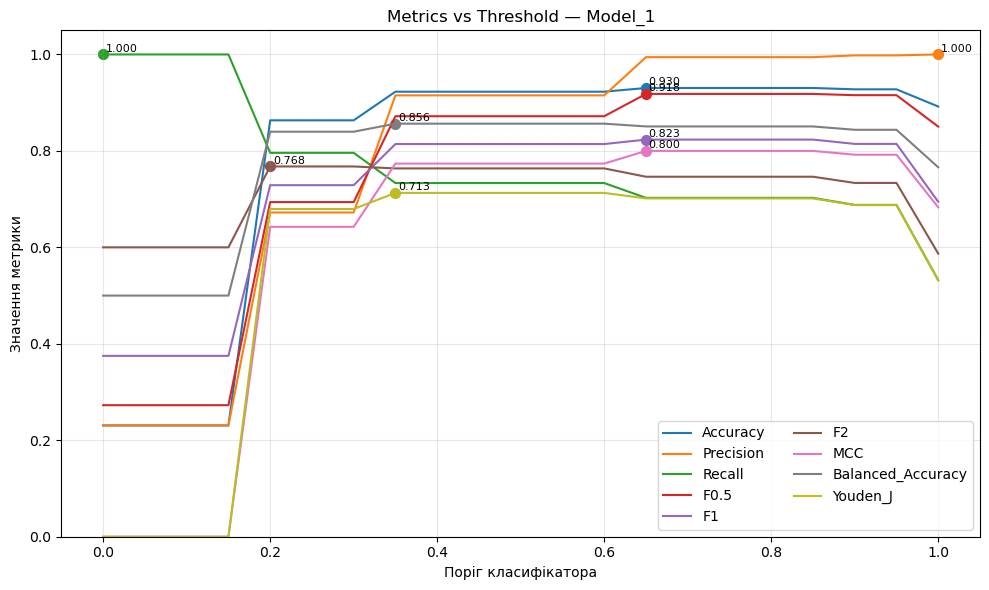

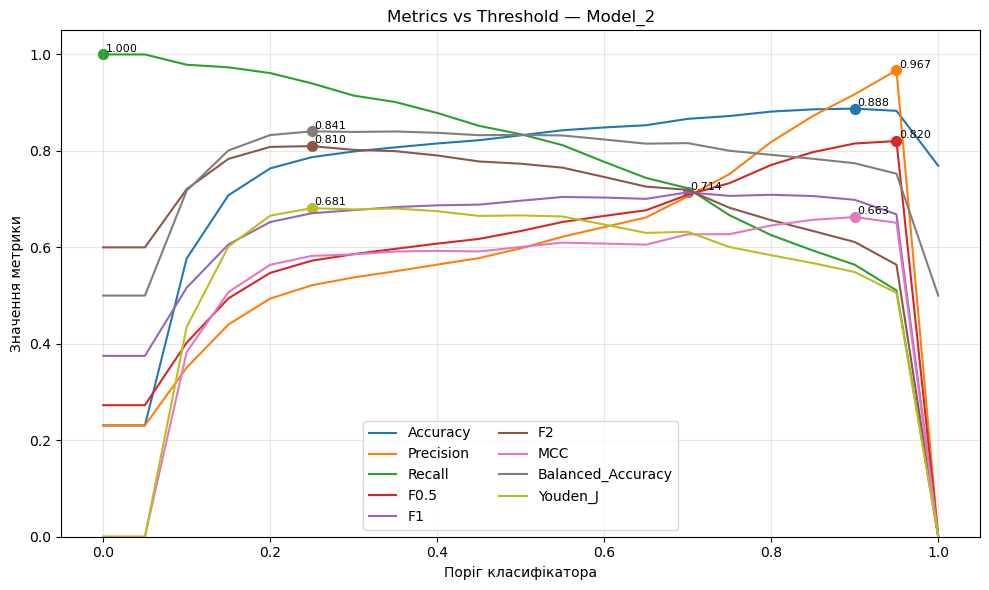

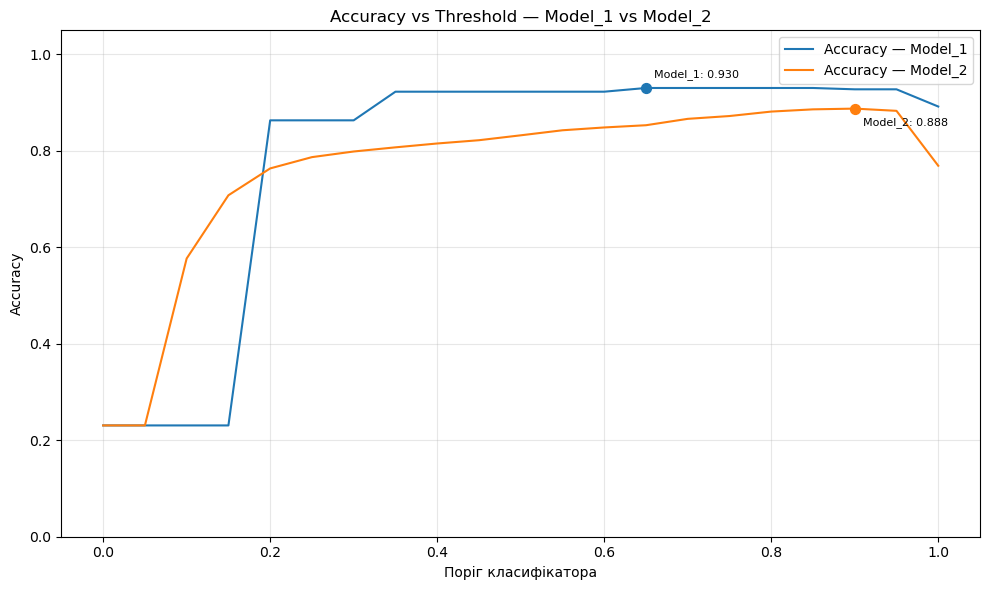

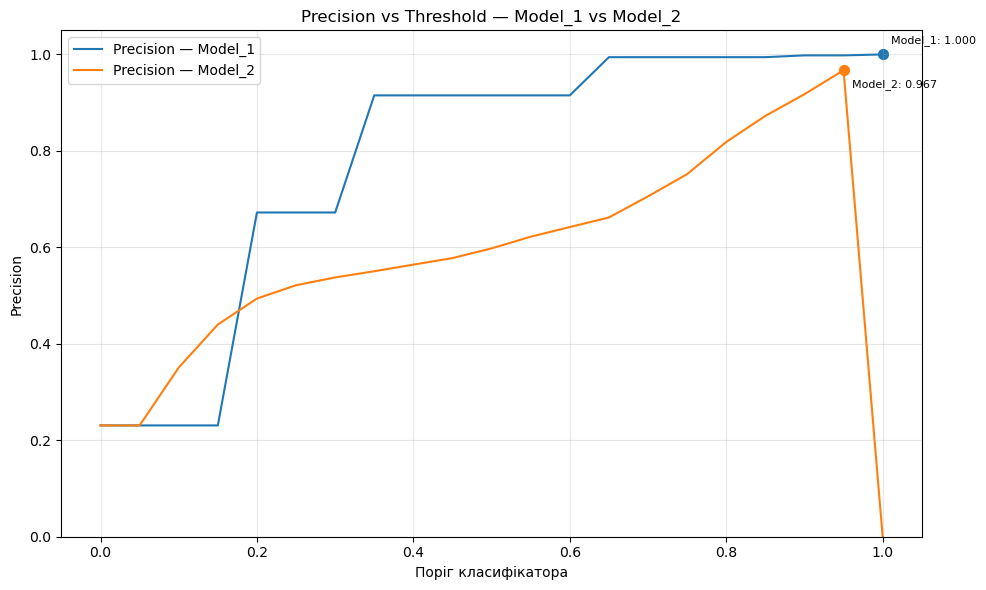

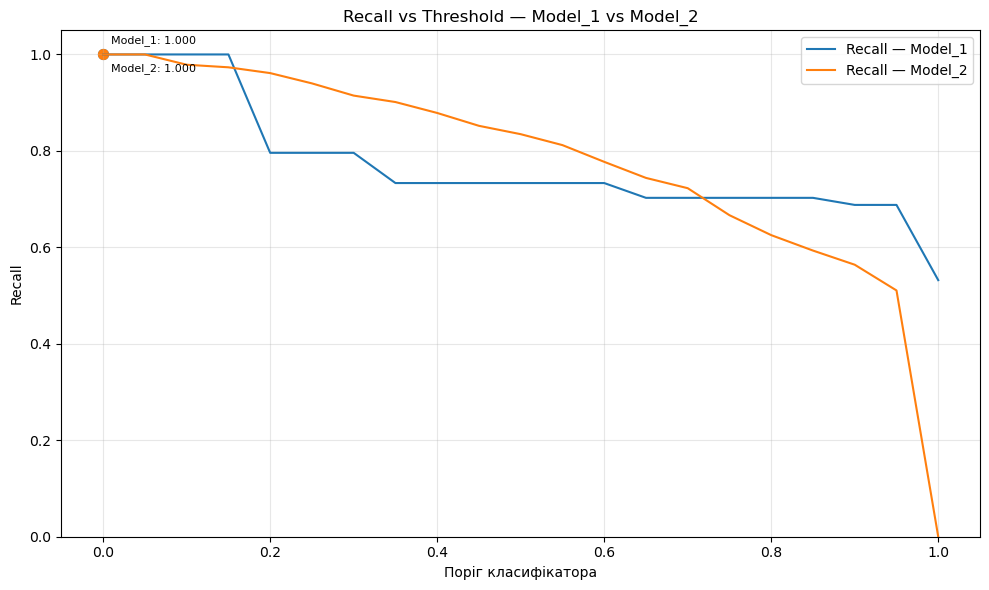

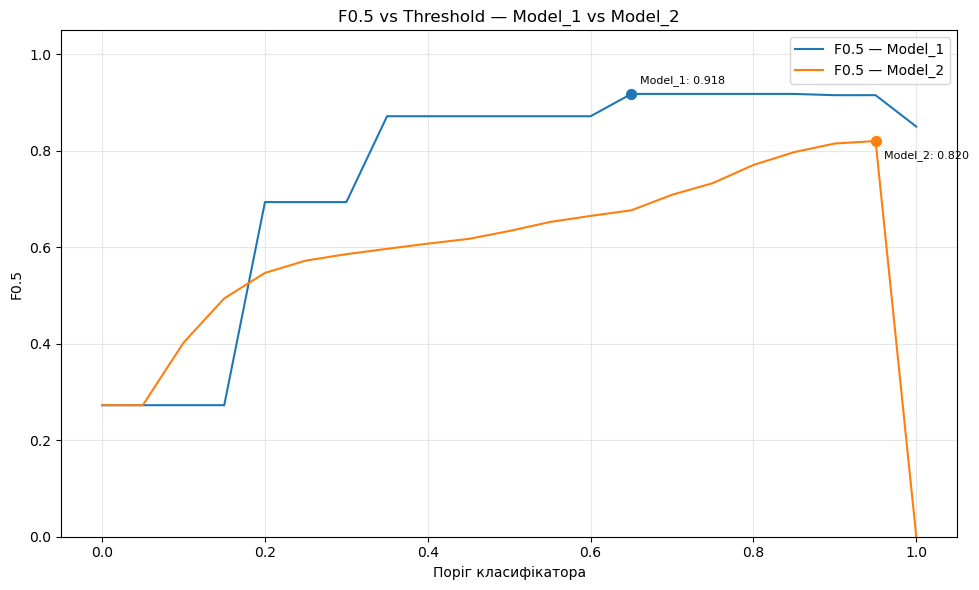

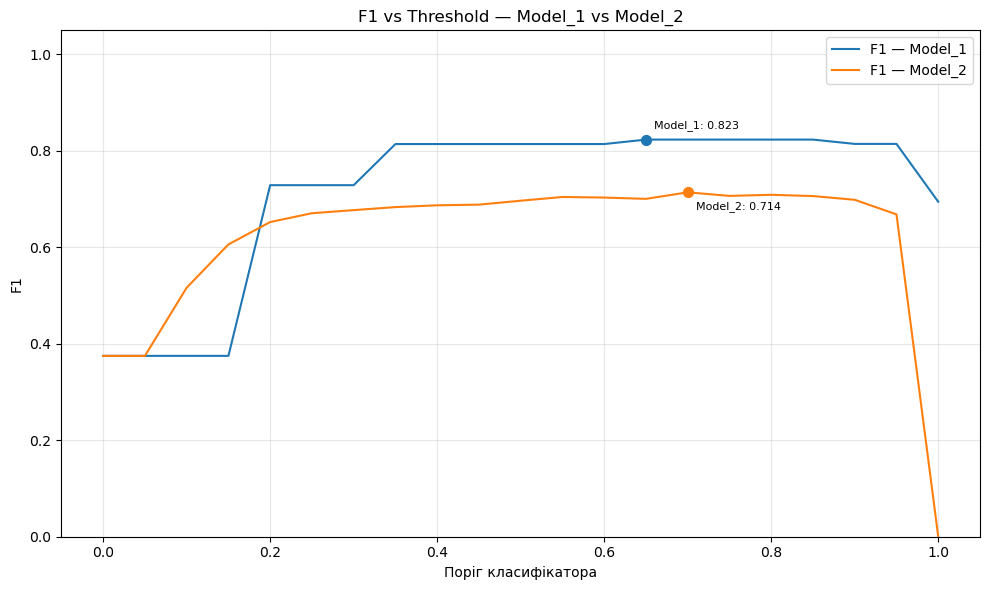

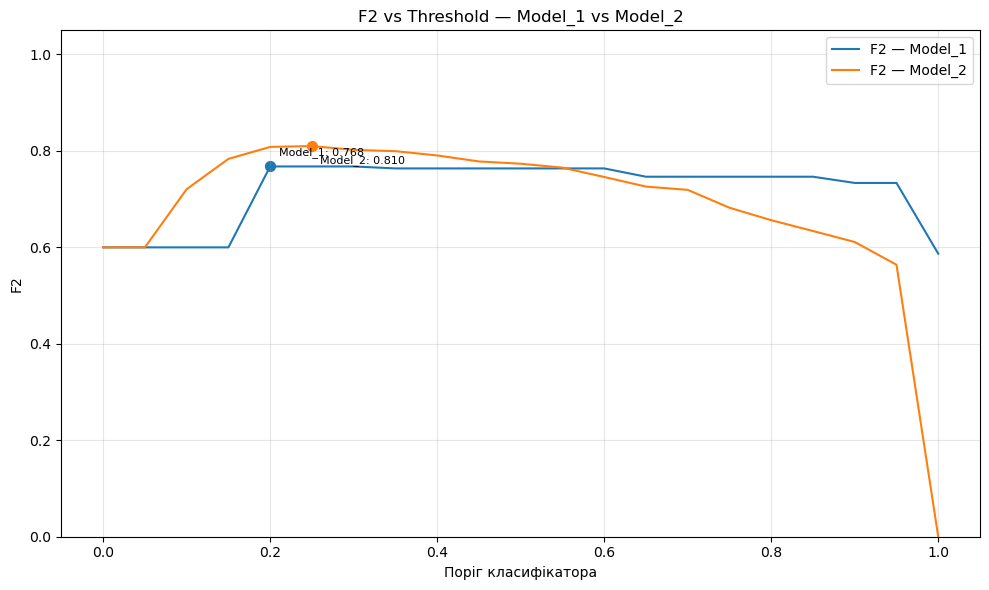

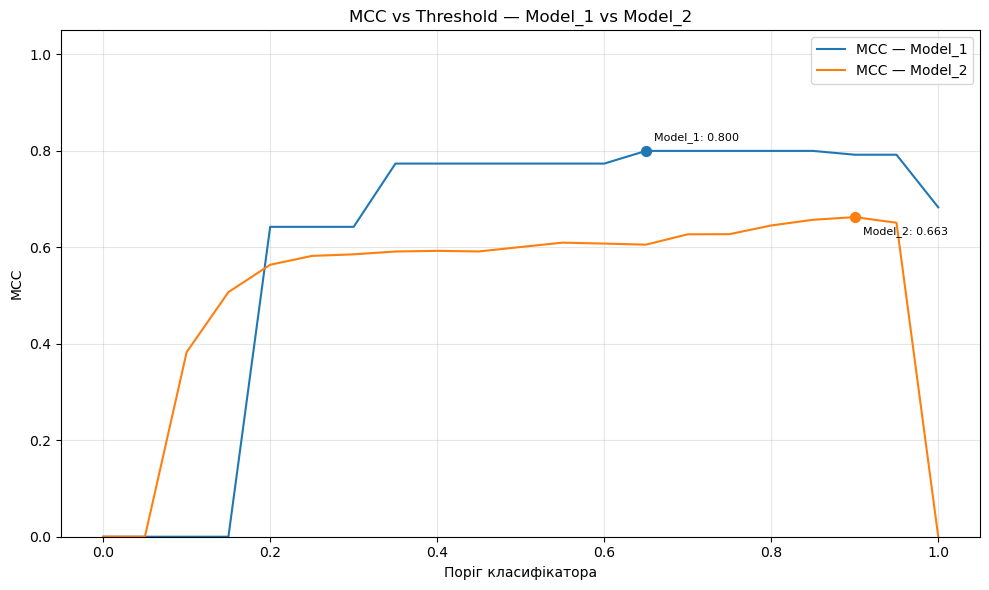

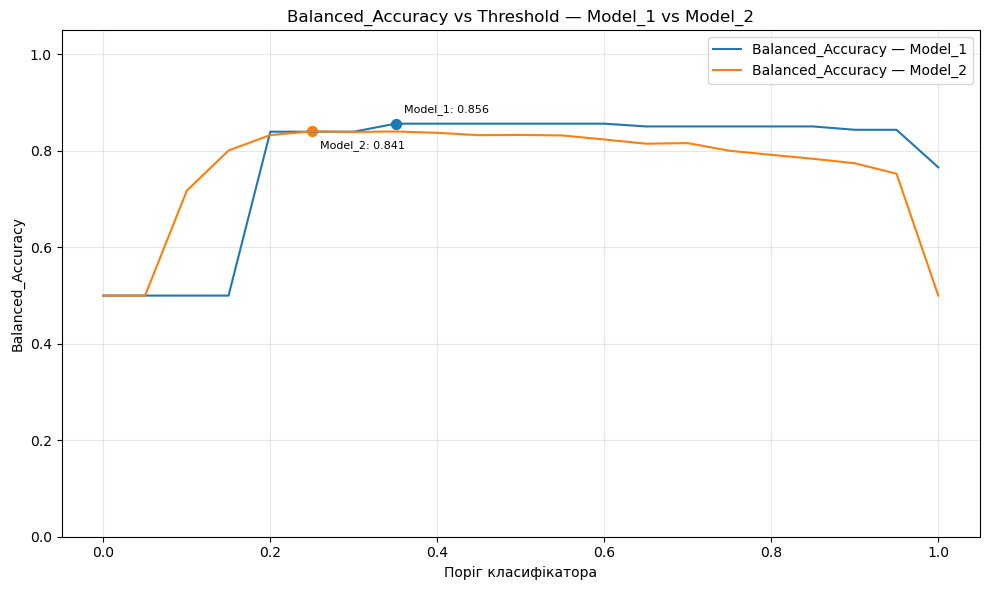

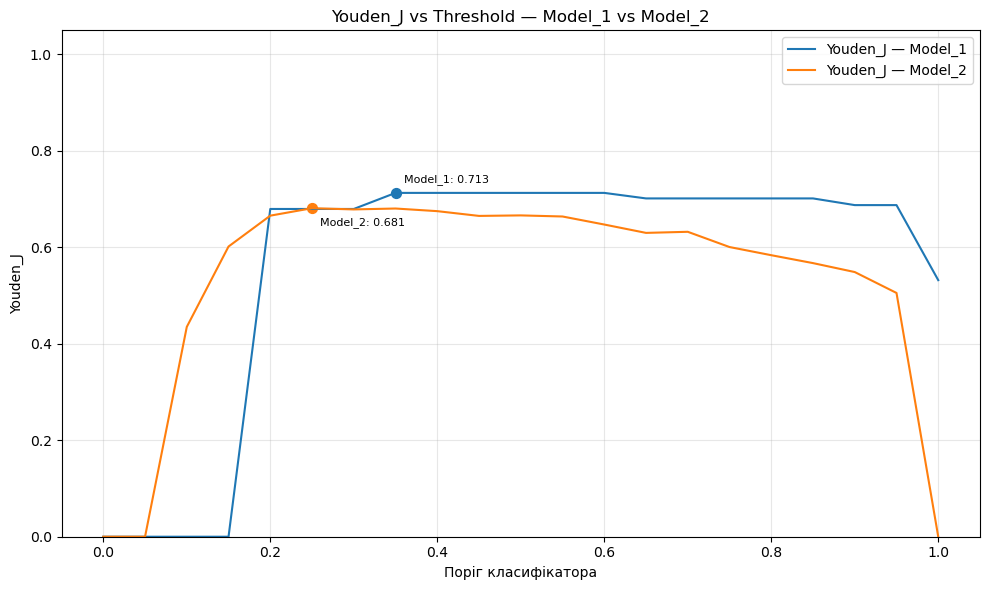

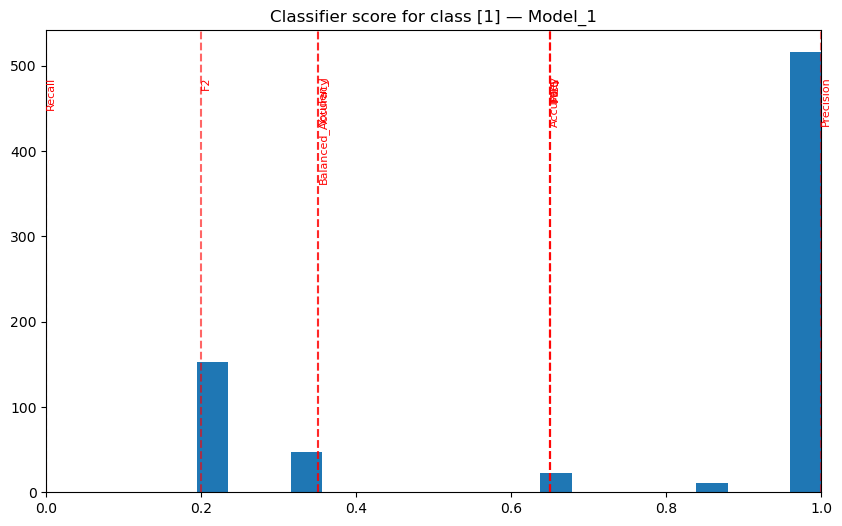

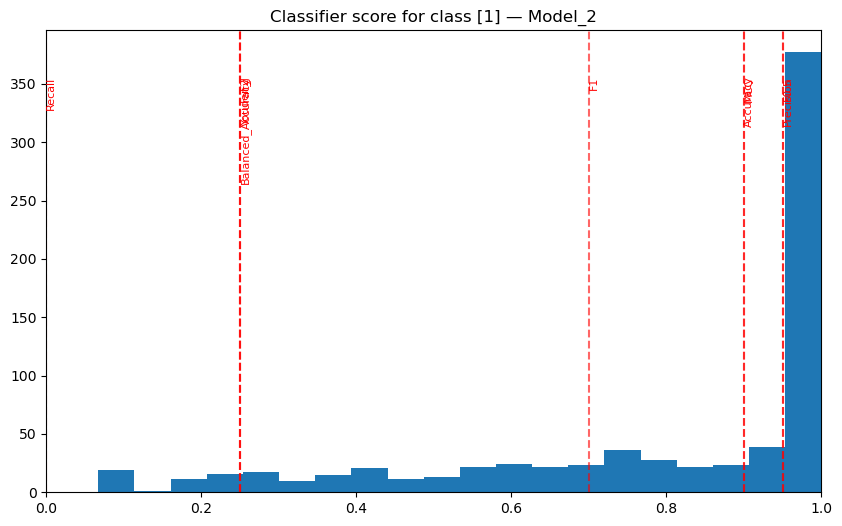

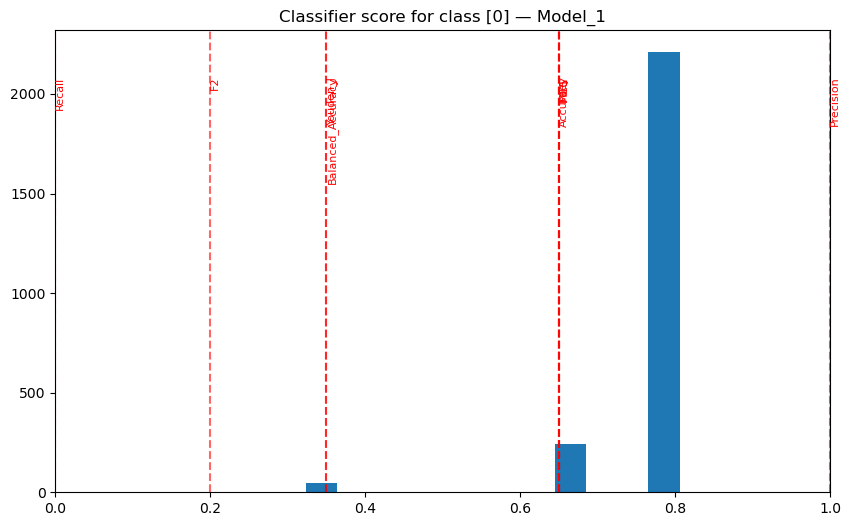

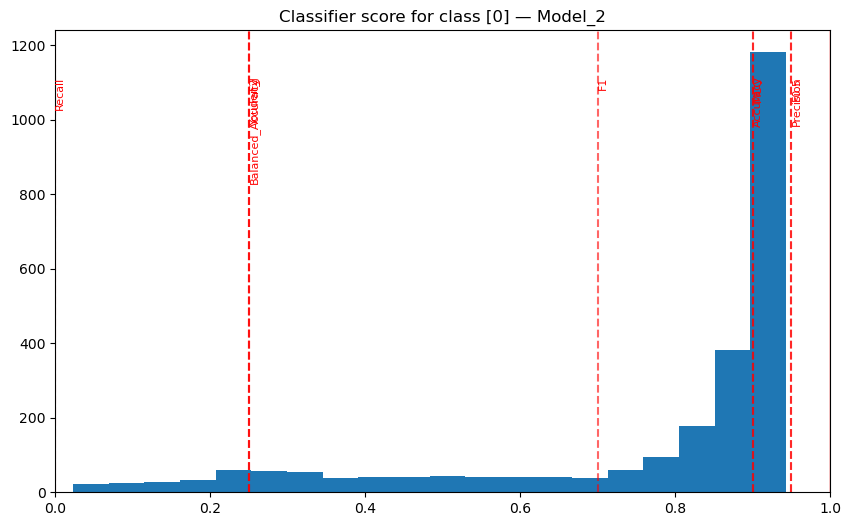

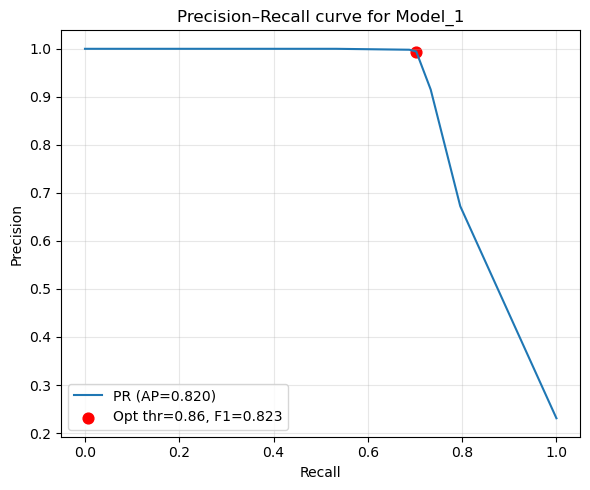

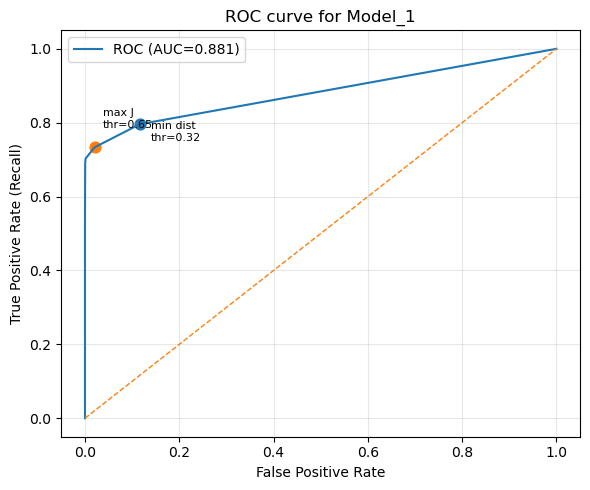

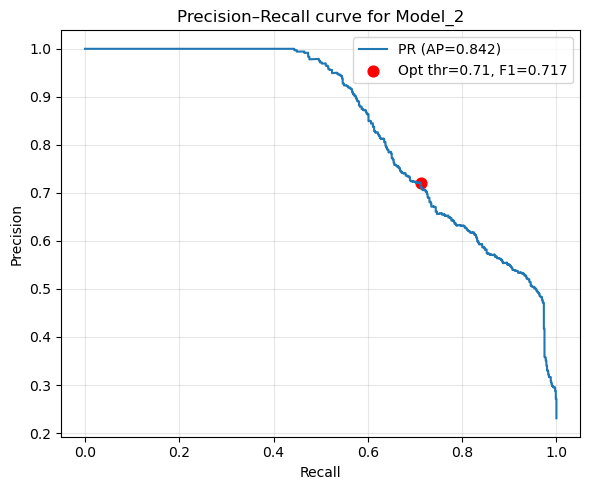

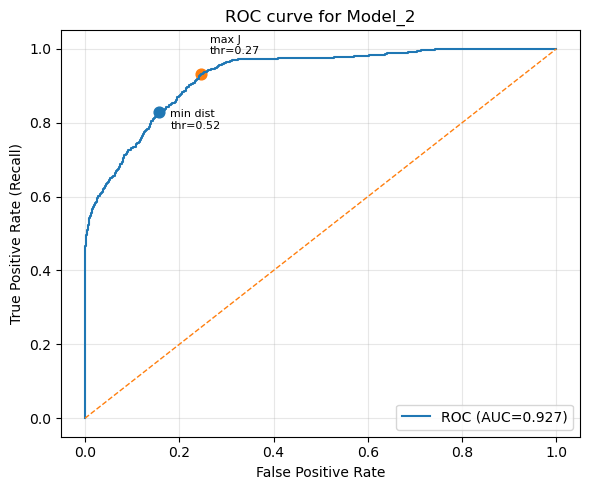

In [27]:

record = []
min_treshold = 0
max_treshold = 1
thresholds = np.linspace(min_treshold, max_treshold, 21)  # обрала крок 0.05
y_true = df_reduced["GT"]
y_score_results = [df_reduced["Model_1"],df_reduced["Model_2"]]
for thr in thresholds:
        for model_result in y_score_results:
            model_name = model_result.name
            y_pred = (model_result >= thr)

            cm = confusion_matrix(y_true, y_pred)
            tn, fp, fn, tp = cm.ravel()

            # Метрики
            acc  = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec  = recall_score(y_true, y_pred, zero_division=0)
            f1   = f1_score(y_true, y_pred, zero_division=0)
            f05  = fbeta_score(y_true, y_pred, beta=0.5, zero_division=0)
            f2   = fbeta_score(y_true, y_pred, beta=2.0, zero_division=0)
            mcc  = matthews_corrcoef(y_true, y_pred)           
            bal_acc  = balanced_accuracy_score(y_true, y_pred)     
            tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
            tpr = tp / (tp + fn) if (tp + fn) > 0 else np.nan
            fpr = fp / (fp + tn) if (fp + tn) > 0 else np.nan
            youden_j = tpr - fpr

            auc_roc = roc_auc_score(y_true, model_result)          
            auc_pr  = average_precision_score(y_true, model_result) 

            record.append({
                "model": model_name, 
                "threshold": thr,
                "TP": tp, "FP": fp, "TN": tn, "FN": fn,
                "Accuracy": acc,
                "Precision": prec,
                "Recall": rec,
                "F0.5": f05,
                "F1": f1,
                "F2": f2,
                "MCC": mcc,
                "Balanced_Accuracy": bal_acc,
                "Youden_J": youden_j,
                "AUC_ROC": auc_roc,  
                "AUC_PR": auc_pr      
            })
record_df_reduced = pd.DataFrame(record).sort_values(["model", "threshold"], ignore_index=True)
print(record)
print(record_df_reduced)
plot_metrics_for_model(record_df_reduced, "Model_1")
plot_metrics_for_model(record_df_reduced, "Model_2")
plot_metric_separately(record_df_reduced, model1="Model_1", model2="Model_2")
classifier_score(df_reduced,record_df_reduced)
roc_pr_for_models(df_reduced)

